<a href="https://colab.research.google.com/github/Dotto-Luis/CoderHouse-Challenges/blob/main/CoderHouse_PRJ_Bank_Marketing_ESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">BANK MARKETING
</h1>

![pic](https://raw.githubusercontent.com/Dotto-Luis/Projects/main/Finance/Bank%20Marketing/pics/Finance-and-Retail-Banking-Blog-Post-1080x628.jpg)

[Presentacion GOOGLE SLIDES ](https://docs.google.com/presentation/d/1plDnCdAgN3u0ZqzlMlQQA4PmtBiDu6JWa_olPPSH4A4/edit?usp=sharing)

↑↑↑↑ Tocando el link los lleva a la presentacion. 


- [x] 01 - Portada 
- [x] 01 - Tabla de contenido 
- [ ] 01 - Descripción del caso 
- [ ] 02 - Tabla de versionado
- [ ] 03 - Objetivo del modelo
- [ ] 04 - Descripción de los datos.
- [ ] 05 - Hallazgos EDA
- [ ] 06 - Algoritmo elegido
- [ ] 07 - Métricas de desempeño
- [ ] 08 - Iteraciones de Optimización. 
- [ ] 09 - Métricas finales del Modelo Optimizado. 
- [ ] 10 - Futuras líneas
- [ ] 11 - Conclusiones.



---

### Indice Notebook


- [ ] 01 - Introduccion
- [ ] 02 - Preguntas y objetivos de la investigacion
- [ ] 03 - Conformacion del equipo de trabajo
- [ ] 04 - Data Acquisition
- [ ] 05 - Data Wrangling
- [ ] 06 - EDA
- [ ] 07 - Modelos
- [ ] 08 - Mejora de modelos
- [ ] 09 - Conclusiones

ver clase 19 hoja 47 para guiarse en las secciones del indice

clase 27 hoja 20

## 1. Intro

El dataset elegido es de [UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#) y [Kaggle](https://www.kaggle.com/code/henriqueyamahata/bank-marketing-classification-roc-f1-recall/notebook). La variable target es 
**y**, lo que significa si el cliente suscribio o no a un deposito a plazo.

## 2. Preguntas y objetivos de la investigacion

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo (variable y).

A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario a plazo) estaría ('sí') o no ('no') suscrito.

## 3. Conformacion del equipo de trabajo

- Correa Bravo Alexis
- Castro Ignacio Joaquin
- Dotto Luis

## 4. Data Acquisition

In [ ]:
dataset = 'https://raw.githubusercontent.com/Dotto-Luis/Projects/main/Finance/Bank%20Marketing/bank-additional-full2.csv'

#### Importando librerias y estableciendo conexion con Google Drive para utilizar Collab

In [ ]:
import pandas as pd
import seaborn as sns #pip install -U seaborn
import plotly.express as px
from matplotlib import pyplot as plt
import numpy as np
import scipy 
#from funpymodeling.exploratory import profiling_num #pip install funpymodeling==0.1.7
import csv
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir('/content/gdrive/My Drive')
# Corran esto en vez de lo anterior -----  cada uno tenga en su drive de inicio el csv (cori)
# no me acuerdo si es colab notebooks o colabnotebooks.. miren
#ruta = '/content/gdrive/MyDrive/Colab Notebooks' #Tengo gdrive en vez de drive para poner cargar el archivo desde mi drive (luis)
#rutadf= ruta + '/bank-additional-full.csv'
#bank= pd.read_csv(rutadf, sep = ",")

Mounted at /content/gdrive
/content


#### Carga del dataset

In [ ]:
bank= pd.read_csv(dataset)

In [ ]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 5. Data Wrangling

#### 5.1 Informacion del dataset



##### Datos del cliente:
- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

##### Relativo al ultimo contacto con el cliente en la actual campania:
- Contact: contact communication type (categorical: 'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### Otros atributos:
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### Atributos Sociales y economicos
- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

##### Variable de Salida - Target:
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

#### 5.2 Descubrimiento

Antes de empezar cualquier análisis, es importante comprender los datos, la estructura, tipos y cantidad. También lo es conocer por qué una compañía los utiliza y cómo. Ésto sirve para tomar decisiones posteriores con un rumbo claro. 

Analicemos las dimensiones de nuestro dataset..

In [ ]:
bank.shape

(41188, 21)

Tambien veamos las variables y su tipo

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
columnsu = ['job','marital','education','default','housing','loan','contact','month','day_of_week']

In [ ]:
bank.head(11)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Como vimos anteriormente con la funsion shape, nuestro dataset tiene 41188 registros y 21 columnas. Veamos con la libreria missingno si hay valores ausentes en alguna columna..

In [ ]:
bank.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [ ]:
bank.duplicated().sum()

12

Hay 12 filas duplicadas en el dataset. Vamos a ver que lineas son:

In [ ]:
bank[bank.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [ ]:
 Duplicados = bank[bank.duplicated(keep='last')]
 print(Duplicados)

       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    uni

In [ ]:
import missingno as msno
%matplotlib inline

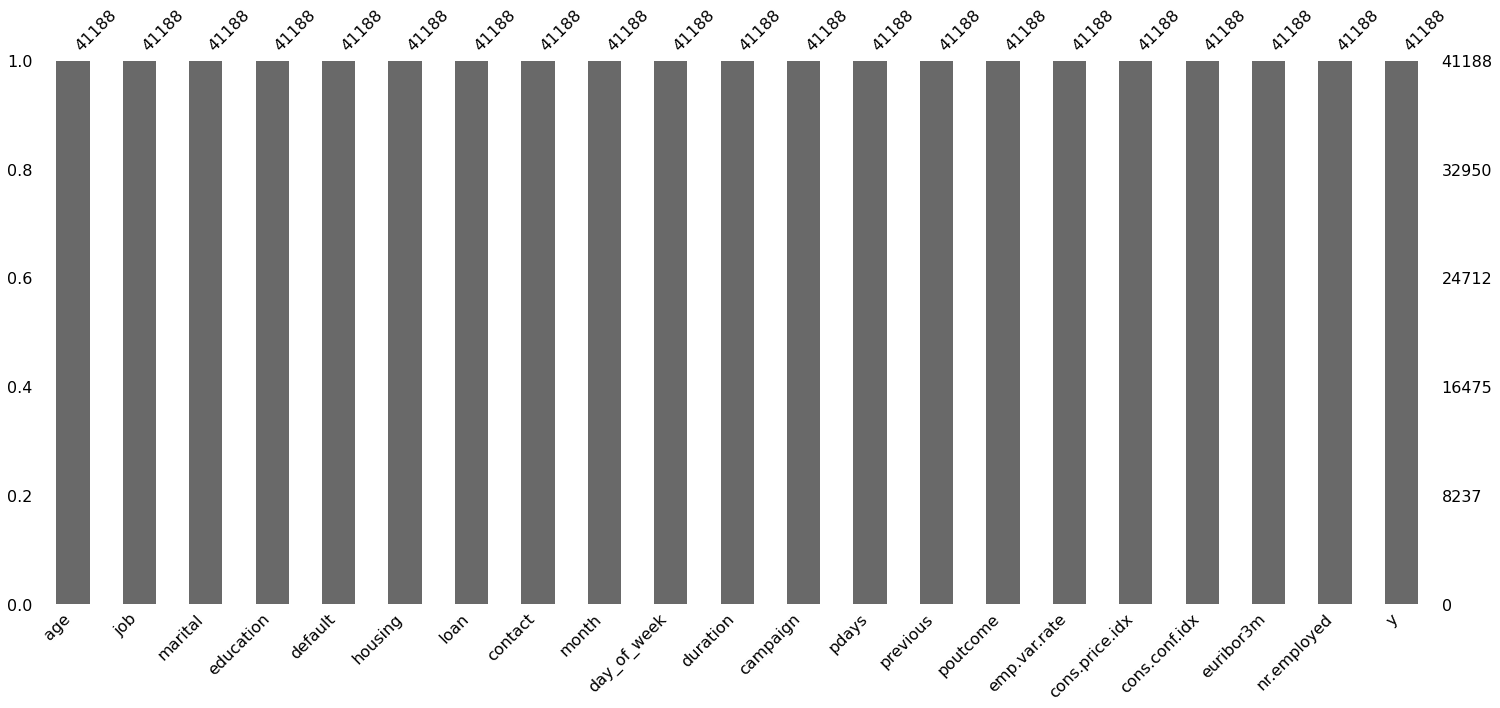

In [ ]:
msno.bar(bank)

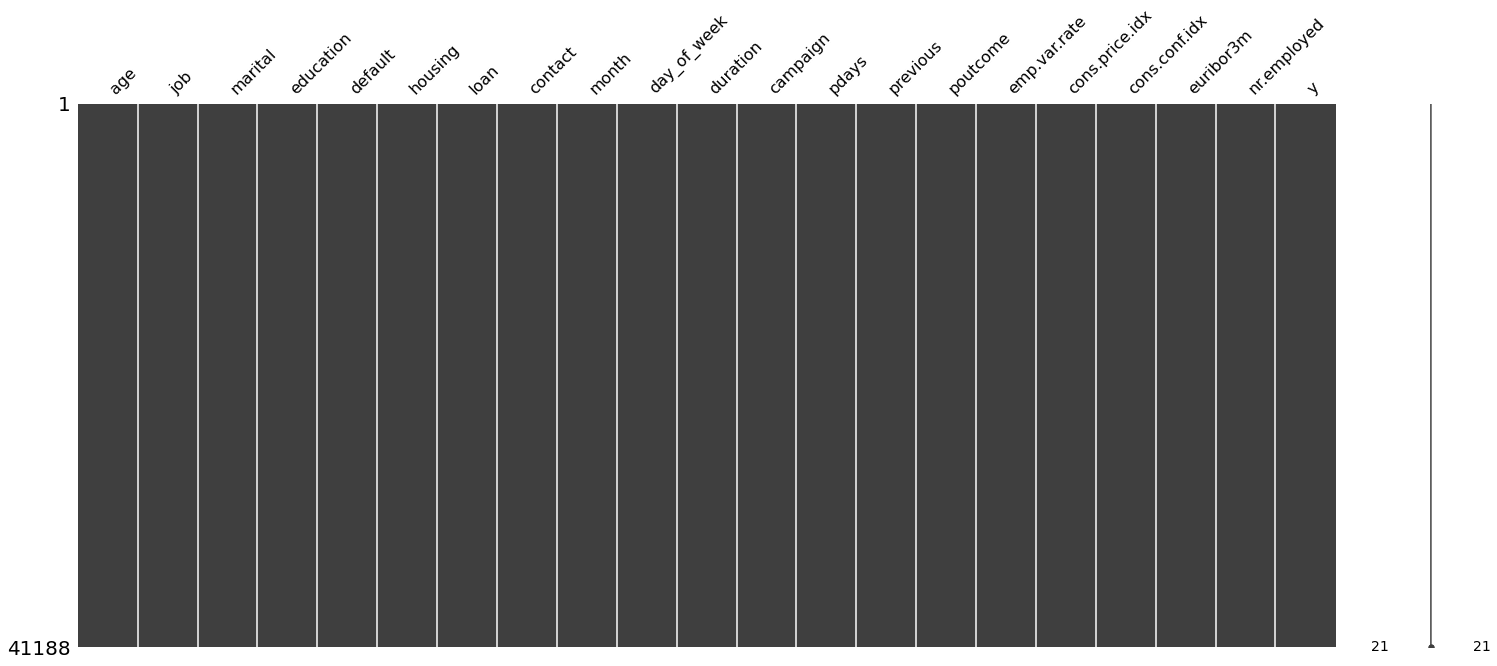

In [ ]:
msno.matrix(bank)

Tambien podemos usar la siguentes funcion de agregacion para ver si hay NA

In [ ]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

A simple vista podriamos decir que no tenemos valores ausentes o nulos en nuestro dataset

Como no tenemos distintas fuentes de datos para estandarizar, obviamos la etapa de Estructuracion y saltamos a la de limpieza..

In [ ]:
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


#### 5.3 Limpieza

En esta etapa debemos eliminar los datos que no brinden información extra como los duplicados, revisar datos faltantes, tomar decisiones sobre qué hacer con los valores missing o los valores nulls (eliminarlos o valorarlos), ver si hay columnas que no aportan información relevante y enlentecen nuestro código,  etc. Esta propiedad estandariza el formato de las columnas (float, datatimes, etc). 

Como dijimos anteriormente a simple vista pareciera todo bien, pero notamos que hay una variable categorica "desconocida" en nuestro dataset...

Veamos cuantos registros contienen este valor y en que porcentaje aparece en cada columna categorica..

In [ ]:
print('Hay un ' + str((bank['job']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna job')
print('Hay un ' + str((bank['marital']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna marital')
print('Hay un ' + str((bank['education']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna education')
print('Hay un ' + str((bank['default']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna default')
print('Hay un ' + str((bank['housing']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna housing')
print('Hay un ' + str((bank['loan']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna loan')
print('Hay un ' + str((bank['contact']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna contact')
print('Hay un ' + str((bank['month']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna month')
print('Hay un ' + str((bank['day_of_week']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna day_of_week')
print('Hay un ' + str((bank['y']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna y')
print('Hay un ' + str((bank['poutcome']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna poutcome')

Hay un 0.8012042342429834 % de registros Unknow en la columna job
Hay un 0.1942313295134505 % de registros Unknow en la columna marital
Hay un 4.202680392347285 % de registros Unknow en la columna education
Hay un 20.87258424783918 % de registros Unknow en la columna default
Hay un 2.40361270272895 % de registros Unknow en la columna housing
Hay un 2.40361270272895 % de registros Unknow en la columna loan
Hay un 0.0 % de registros Unknow en la columna contact
Hay un 0.0 % de registros Unknow en la columna month
Hay un 0.0 % de registros Unknow en la columna day_of_week
Hay un 0.0 % de registros Unknow en la columna y
Hay un 0.0 % de registros Unknow en la columna poutcome


Vamos a establecer un dataset limpio sin incluir estos valores desconocidos, ya que representa la quinta parte de nuestro dataset y esto puede afectar al algoritmo para predecir nuestra variable target.
Haremos una comparacio luego para ver como este valor influye en el modelo..

In [ ]:
bank2 = bank.drop(bank[bank['default']=='unknown'].index)
bank2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
print(str(bank.shape[0] - bank2.shape[0]))

8597


Tenemos un total de 8597 registros menos dado que quitamos los registros que tienen valor desconocido en default

Ahora procedemos a la eliminacion de las filas duplicadas

In [ ]:
Bank = bank.drop_duplicates(subset=None, 
                          keep='first', 
                          inplace=False, 
                          ignore_index=False)

In [ ]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [ ]:
Bank['marital'] = Bank['marital'].str.capitalize()
Bank['month'] = Bank['month'].str.capitalize()
Bank['education'] = Bank['education'].str.capitalize()
Bank['job'] = Bank['job'].str.capitalize()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
Bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,Housemaid,Married,Basic.4y,no,no,no,telephone,May,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,Services,Married,High.school,unknown,no,no,telephone,May,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,Services,Married,High.school,no,yes,no,telephone,May,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,Admin.,Married,Basic.6y,no,no,no,telephone,May,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,Services,Married,High.school,no,no,yes,telephone,May,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,Retired,Married,Professional.course,no,yes,no,cellular,Nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,Blue-collar,Married,Professional.course,no,no,no,cellular,Nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,Retired,Married,University.degree,no,yes,no,cellular,Nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,Technician,Married,Professional.course,no,no,no,cellular,Nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### 5.5 Validacion
Es muy importante para los equipos, asegurarse que los datos son precisos  y que la información no se alteró durante el proceso. Esto significa asegurar la fiabilidad, credibilidad y calidad de los datos limpios debido a que van a utilizarse para tomar decisiones. 

Hasta ahora tenemos aqui 4 datasets..

- **bank** dataset original
- **Bank** dataset original menos los duplicados
- **bank2** dataset reducido, quitando variables desconocidas en default
- **bank_y** dataset con variables categoricas trasnformadas a numericas

In [ ]:
print('Shape de Bank '+ str(Bank.shape))
print('Shape de bank2 '+ str(bank2.shape))

Shape de Bank (41176, 21)
Shape de bank2 (32591, 21)


---

## 6. EDA

### Análisis Univariado


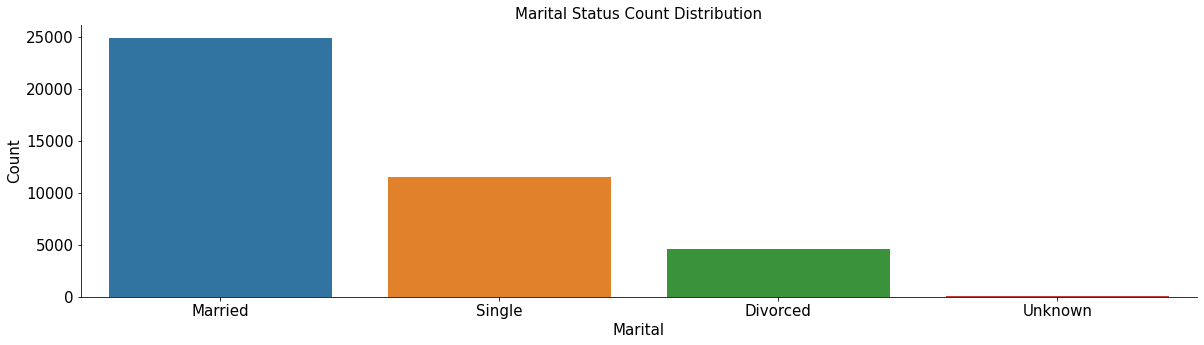

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'marital', data = Bank)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Status Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.show()

Vemos que la mayoría de entrevistados son personas casadas

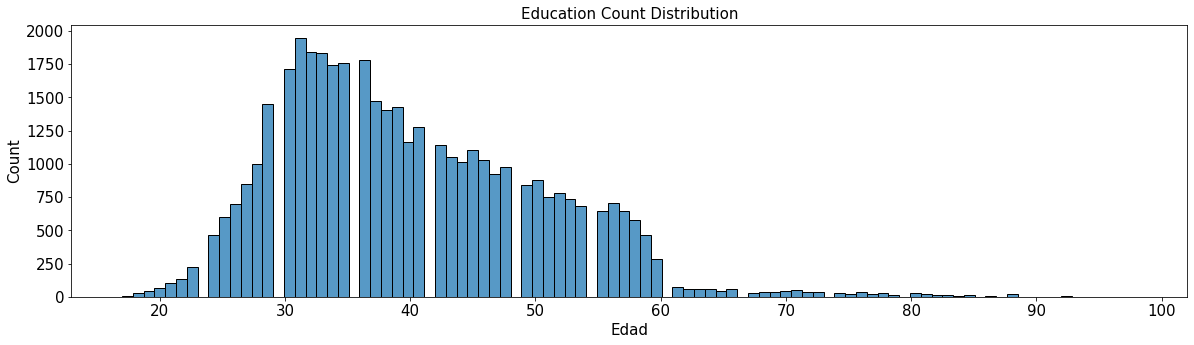

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.histplot(x = 'age', data = Bank)
ax.set_xlabel('Edad', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

Vemos que la mayoria de las personas tienen entre 30 y 50 años

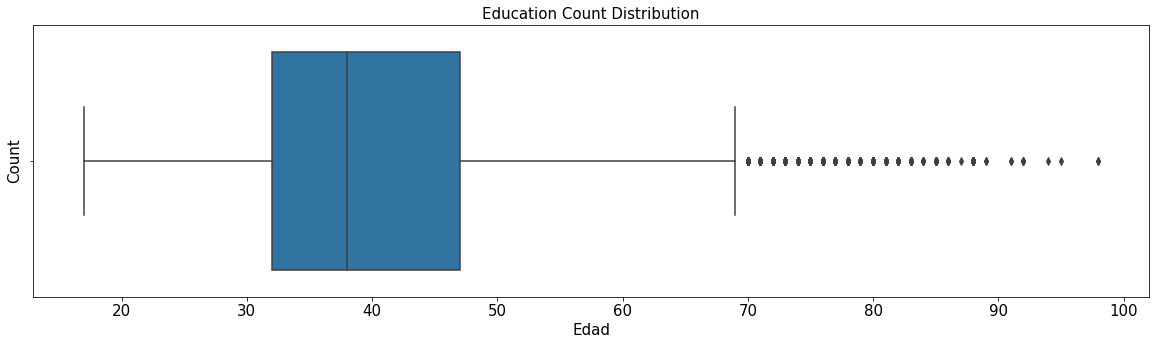

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.boxplot(x = 'age', data = Bank)
ax.set_xlabel('Edad', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

Como podemos ver en el gráfico hay outliers con respecto a la edad de los entrevistados, hay ciertas personas mayores a 70.

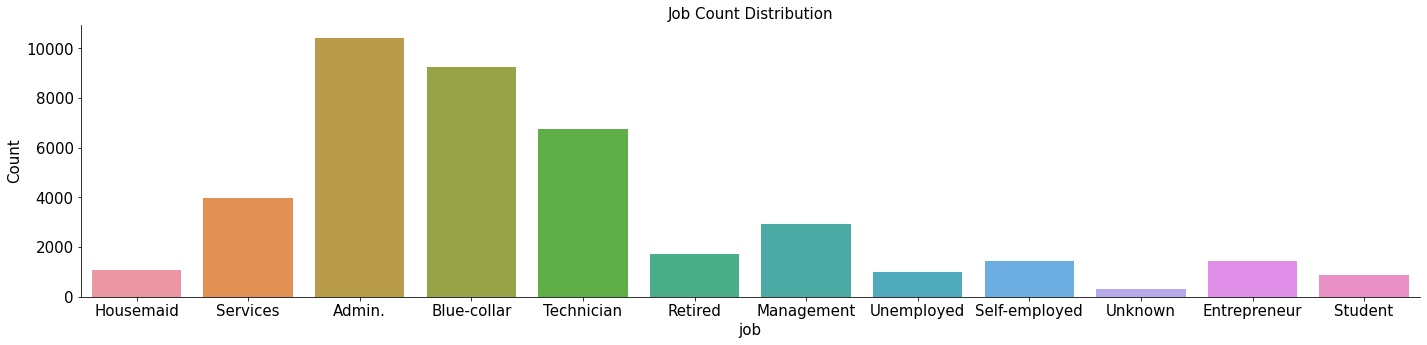

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 5)
sns.countplot(x = 'job', data = Bank)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

La mayoría de entrevistados trabaja en empleos de administración, seguido por trabajadores de cuello azul y técnicos. Las capas más bajas las componen amas de casa, estudiantes y desempleados.

In [ ]:

Education = Bank.groupby('education').agg('count')


In [ ]:
Educations = Education.iloc[0:11,0]
Educations

education
Basic.4y                4176
Basic.6y                2291
Basic.9y                6045
High.school             9512
Illiterate                18
Professional.course     5240
University.degree      12164
Unknown                 1730
Name: age, dtype: int64

Index(['Basic.4y', 'Basic.6y', 'Basic.9y', 'High.school', 'Illiterate',
       'Professional.course', 'University.degree', 'Unknown'],
      dtype='object', name='education')


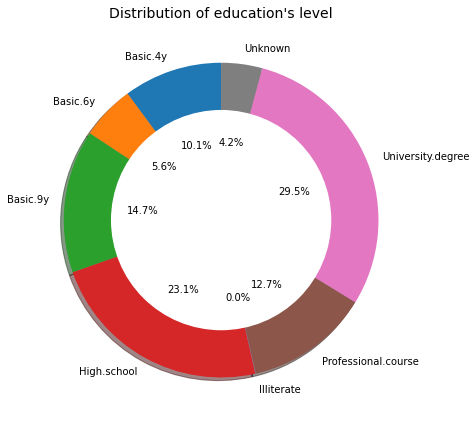

In [ ]:
labels = Educations.index
print(labels)
pie, ax = plt.subplots(figsize=[10,6])
fig=plt.pie(x=Educations, autopct="%.1f%%",labels=labels,\
            pctdistance=0.5,shadow=True, startangle=90)
plt.title("Distribution of education's level", fontsize=14);
plt.tight_layout();
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Analizando el gráfico, notamos que la mayoría de los entrevistados posee un título universitario, el segundo grupo más grande tiene grado educacional de secundaria.

### Análisis Bivariado

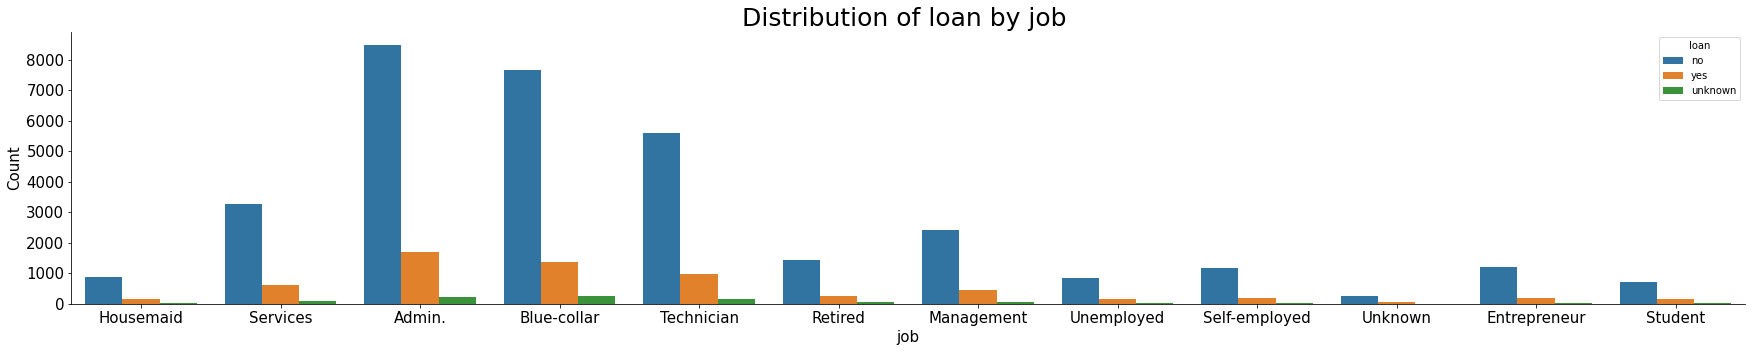

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 5)
sns.countplot(x = 'job', hue = 'loan', data = Bank)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Distribution of loan by job ', fontsize=25)
ax.tick_params(labelsize=15)
sns.despine()

Observamos que en general la mayoria de los entrevistados no tuvo un préstamo, y eso no depende de su puesto laboral.

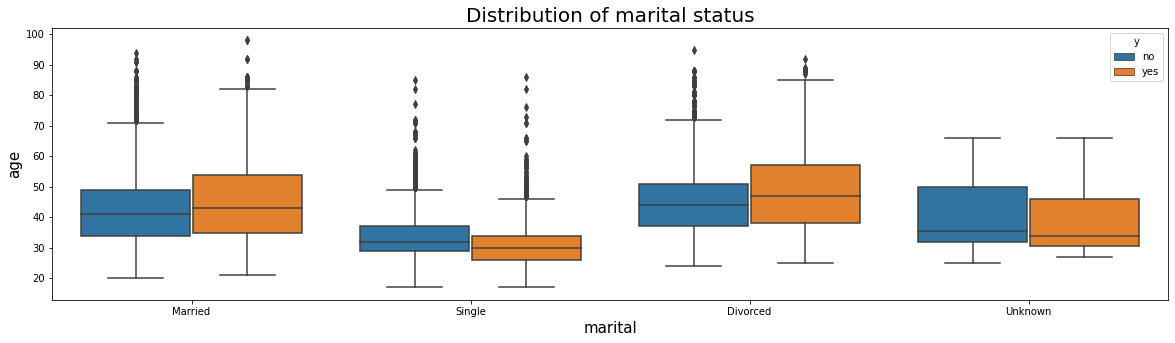

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.set_xlabel('marital', fontsize=15)
ax.set_ylabel('Age',fontsize=15)
ax.set_title('Distribution of marital status', fontsize=20)
sns.boxplot(x='marital', y='age', hue='y', data=Bank, saturation=0.75, width=0.8, dodge=True,)

En la distribución de los estados civiles, vemos que las edades outliers más altas en general estan en las personas casadas y divorciadas en su mayoría. Podemos observar que la mayoria de los casados y divorciados contrata el producto, mientras que en las categorías soltero y 'no determinado' la variable y esta mas pareja.

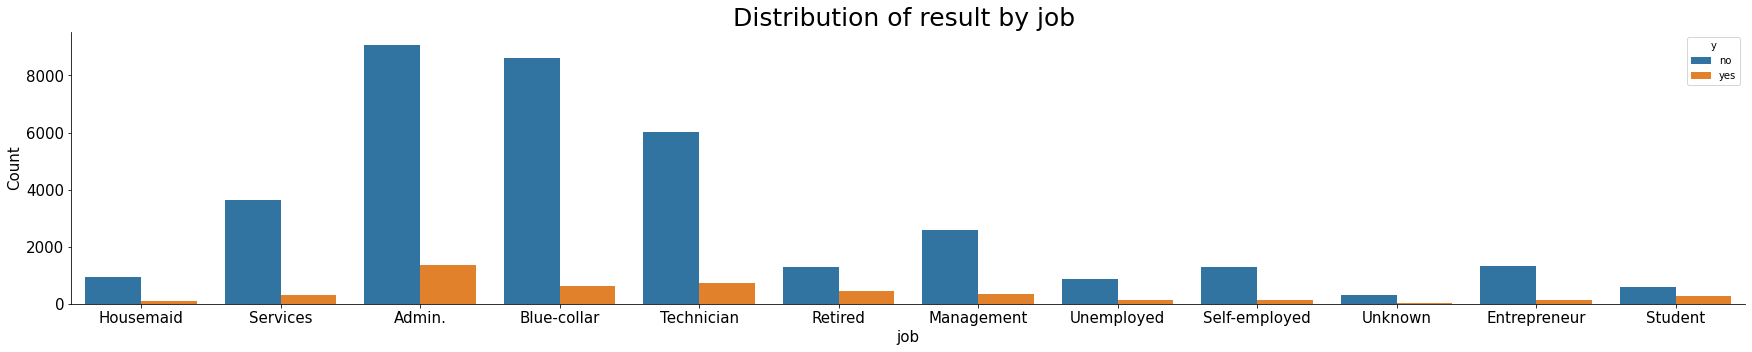

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 5)
sns.countplot(x = 'job', hue = 'y', data = Bank)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Distribution of result by job ', fontsize=25)
ax.tick_params(labelsize=15)
sns.despine()

Analizando la distribución vemos que el "no" gana en todas las categorías, sin importar el puesto laboral

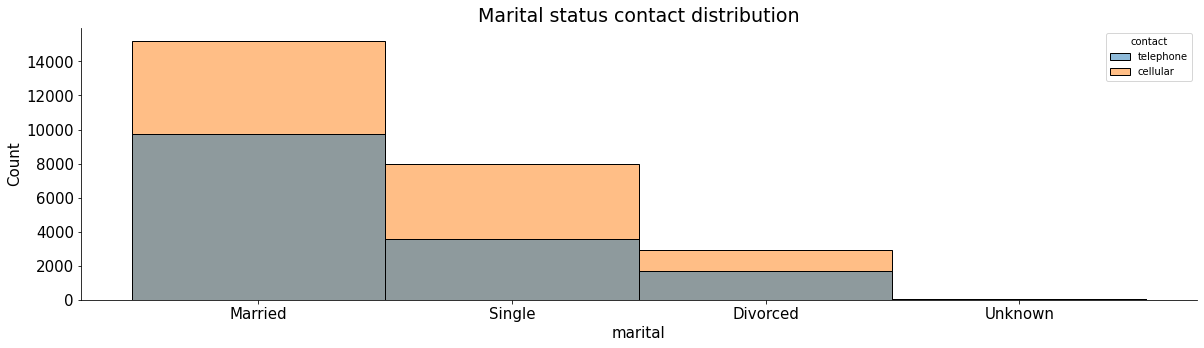

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.histplot(x = 'marital', hue = 'contact', data = Bank)
ax.set_xlabel('marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital status contact distribution', fontsize=19)
ax.tick_params(labelsize=15)
sns.despine()

Como lo demuestra el gráfico, la mayoria de los entrevistados casados y divorciados son entrevistados por teléfono, mientras que los solteros son más asiduos a responder por celular. 

Text(0.5, 1.0, 'Marital status age distribution')

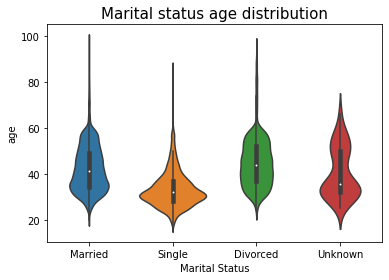

In [ ]:
ax = sns.violinplot(x="marital", y="age", data=Bank, split=False)
ax.set_xlabel("Marital Status")
ax.set_title('Marital status age distribution', fontsize=15)

Se detalla que los jovenes componen mayormente el grupo de solteros, mientras que casados y divorciados tienen una media mas alta, como era previsible

### Análisis Multivariado

In [ ]:
Bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


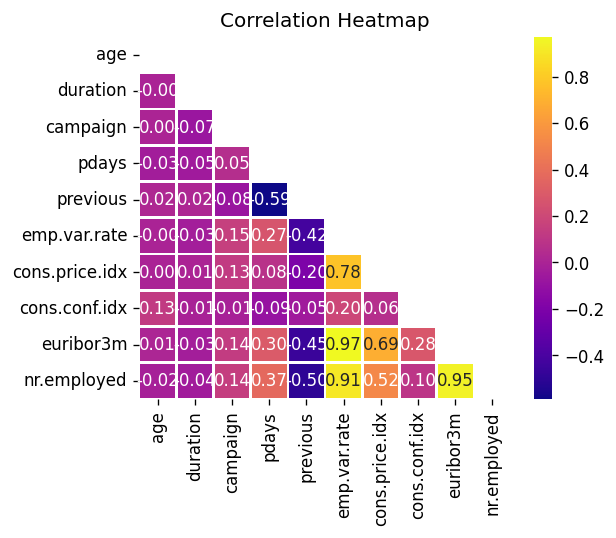

In [ ]:
#Pairplot
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(Bank.corr(),dtype = bool))
sns.heatmap(Bank.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Vemos que las categorías con mayor correlación son emp.var.rate con euribor3m, nr.employed y cons.price.idx

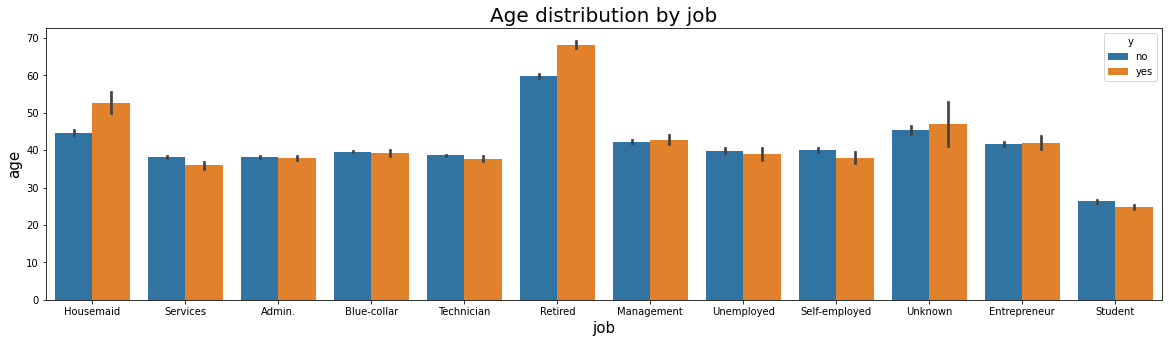

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('age', fontsize=15)
ax.set_title("Age distribution by job", fontsize=20)
sns.barplot(x='job',y='age', hue='y',data=Bank)

plt.show()

La distribución de la edad con respecto al tipo de trabajo muestra que las personas de mayor edad estan retiradas, miientras que las otras categorias se encuentran realmente parejas: servicios, adminitrativos, trabajadores de cuello azul, técnicos. La contratación del producto es pareja en todos los puestos laborales. El mayor porcentaje de "si" esta en el grupo de retirados y en el de empleados domésticos.

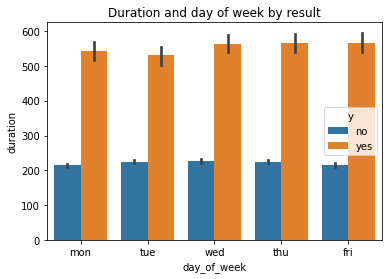

In [ ]:
graf1 = sns.barplot(x='day_of_week',y='duration', hue='y',data=Bank)
graf1.set_title("Duration and day of week by result")
plt.show()

Sin importar el dia de la semana, la mayoría de "Y" es abrumadora y tiene mayor
duración

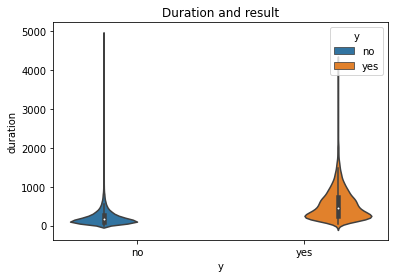

In [ ]:
graf3 = sns.violinplot(x='y',y='duration', hue='y',data=Bank)
graf3.set_title("Duration and result")
plt.show()

En el violinplot se detalla que en las suscripciones de depósitos a plazo se realizan en las llamadas más largas.

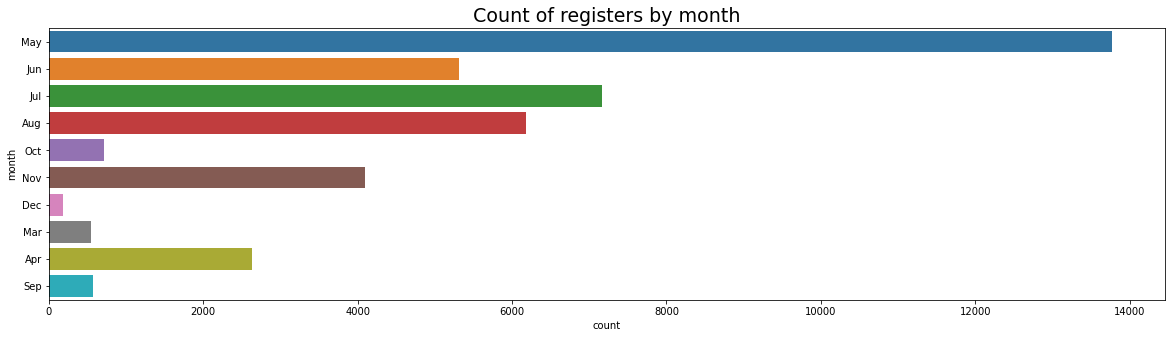

In [ ]:
plt.figure(figsize=(20,5))
graf4 = sns.countplot(y='month',data=Bank)
graf4.set_title('Count of registers by month', fontsize=19)
plt.show()

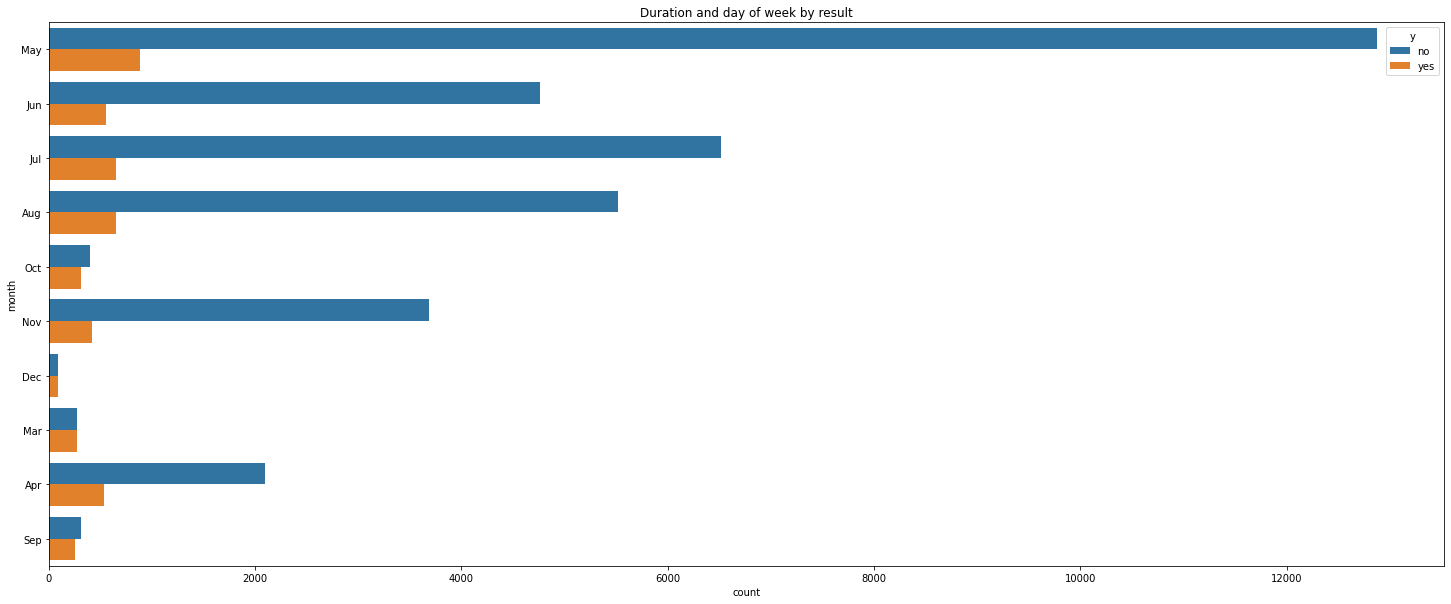

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
graf5 = sns.countplot(y='month',hue='y',data=Bank)
graf5.set_title("Duration and day of week by result")
plt.show()

Se observa que la mayoría de los registros se desarrolla en el mes de mayo

## 7. MODELOS

Dado que nuestro problema es de classificacion veremos tres algoritmos para elegir al mejor. Para ello no solo tomaremos una metrica para su comparacion, sino que buscaremos obtener varias metricas para elegir el mejor modelo. 

Modelos elegidos:

- 7.1 SVM
- 7.2 Decission Tree
- 7.3 Random Forest

Metricas elegidas:

- **Accuracy (exactitud)**

El accuracy es una medida verdaderamente intuitiva, puesto que se limita a calcular la relación entre las predicciones correctas de un modelo, versus el total de predicciones que llevó a cabo.

¿Cuándo resulta útil solo observar el accuracy? Principalmente cuando el costo de un falso positivo es el mismo que el de un falso negativo. Esta medida puede ser engañosa si tiene un número desigual de observaciones en cada clase o si tiene más de dos clases.

Hay que tener cuidado de que la métrica accuracy (exactitud) no funciona bien cuando las clases están desbalanceadas.

Para calcular la precisión usaremos la siguiente fórmula:

\begin{equation}
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
\end{equation}


- **Matriz de confusion**

Veremos tambien la matriz de confusion, que nos permitira ver los tipos de errores que esta cometiendo nuestro modelo. 

A modo de ejemplo podemos ver en la primer imagen que un hipotético caso de marketing. En este ejemplo, contactamos a 100 clientes y 80 de ellos nos dicen que no están interesados y 20 de ellos que sí. Nuestro modelo (en el ejemplo) no es muy bueno, aunque dependiendo de qué métrica usemos podría parecer que es mejor de lo que es.

Valores de la clasificación binaria:

0: no está interesado
1: sí está interesado


![pic](https://www.iartificial.net/wp-content/uploads/2019/11/Matriz-Confusion-Ejemplo.png)

* - TP: True Positive
* - TN: True Negative
* - FP: False Positive
* - FN: False Negative



Con los valores obtenidos de esta matriz tambien podemos sacar otras metricas como..

- **Precision**

Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación. En el ejemplo, se refiere a que la precisión es la respuesta a la pregunta ¿qué porcentaje de los clientes que contactemos estarán interesados?

Para calcular la precisión usaremos la siguiente fórmula:

\begin{equation}
precision = \frac{TP}{TP+FP}
\end{equation}


- **F1 score**

El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

F1 se calcula haciendo la media armónica entre la precisión y la exhaustividad:

\begin{equation}
F1 = 2* \frac{Precission * Recall}{Precission + Recall}
\end{equation}

siendo:

\begin{equation}
Recall = \frac{TP}{TP+FN}
\end{equation}

Generamos dummies y construimos las variables input del modelo X e Y. Al ser la primera vez que realizamos los modelos a asignarles el numero 1 a las variables en el caso de que luego tendramos que hacer una modificacion de las mismas...

In [ ]:
bank3 = pd.get_dummies(data=Bank, drop_first=True)
bank3.shape

(41176, 54)

In [ ]:
X1 = bank3.drop(['y_yes'], axis = 1)
y1 = bank3['y_yes'] 

### 7.1 SVM

Nuestro primer algoritmo, el SVM o Support Vector Machine, se utiliza principalmente para resolver problemas de clasificación. Los vectores de soporte no son más que las coordenadas de cada elemento de datos. Support Vector Machine es una frontera que diferencia dos clases usando hiperplanos.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1.values,
                                                    y1, test_size=0.3,random_state=42) # 70% training and 30% test

#'age','month_apr', 'month_aug', 'month_dec',	'month_jul',	'month_jun',	'month_mar',	'month_may',	'month_nov',	'month_oct',	'month_sep','duration','cons.price.idx','campaign'

In [ ]:
X_test

array([[5.90e+01, 1.46e+03, 1.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.40e+01, 2.48e+02, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.20e+01, 2.75e+02, 2.00e+00, ..., 1.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [3.20e+01, 2.37e+02, 2.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.40e+01, 1.38e+02, 2.00e+00, ..., 1.00e+00, 1.00e+00, 0.00e+00],
       [2.40e+01, 8.00e+00, 6.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

In [ ]:
from sklearn import svm
#Svm Classifier
clf = svm.SVC(kernel='rbf',C=0.1) # Kernel Lineal (Existen diversos tipos de kernel linear, rbf, poly,sigmoid )
#Entrenar el modelo
clf.fit(X_train, y_train)
#Obtener las predicciones
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn import metrics
#Accuracy
ASVM = print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
ASVM

Accuracy: 0.8960576378207723


[[10765   164]
 [ 1120   304]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


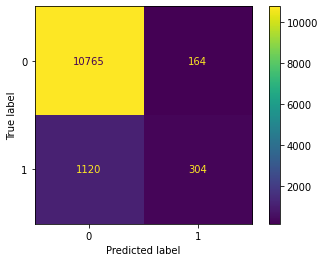

In [ ]:
#Matriz de Confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))

#Ploteamos la Matriz
plot_confusion_matrix(clf, X_test, y_test)
#plt.show()

In [ ]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")

NameError: ignored

In [ ]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

NameError: ignored

### 7.2 Decission Tree

Nuestro segundo modelo, es el Arbol de decision. Este modelo tiene un enfoque de arriba hacia abajo con la estructura del diagrama de flujo que maneja datos de alta dimensión. 

Los resultados se predicen en función de la variable de entrada dada. Árbol de decisión compuesto por los siguientes elementos: una raíz, muchos nodos, ramas, hojas. El nodo raíz realiza la partición en función del valor de atributo de la clase, el nodo interno toma un atributo para una clasificación adicional, las ramas toman una regla de decisión para dividir los nodos en nodos hoja, por último, los nodos hoja nos dan el resultado final. 

La complejidad temporal del árbol de decisión depende del número de registros, atributos de los datos de entrenamiento. Si el árbol de decisión es demasiado largo, es difícil obtener los resultados deseados.

Importamos el modelo, especificamos cuanto % queremos que tenga de test y lo creamos

In [ ]:
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=42) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) 

In [ ]:
tree.fit( X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_train_pred = tree.predict(X_train) 
y_test_pred = tree.predict(X_test) 

Calculamos el accuracy en train y test

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9034798598341602
% de aciertos sobre el set de evaluación: 0.9014004695215737


A simple vista da "demasiado bien" el modelo

Veamos la importancia de cada feature..

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


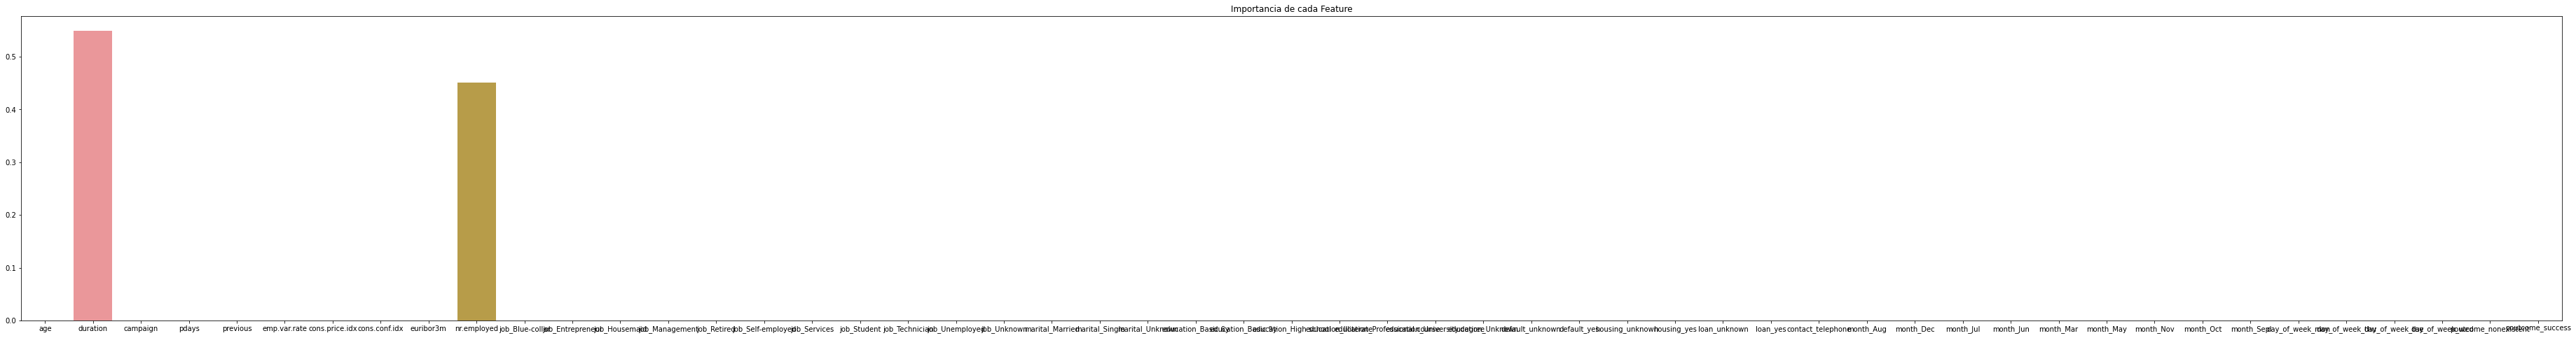

In [ ]:
plt.figure(figsize=(65,8))
importances = tree.feature_importances_
columns = X1.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

Vemos que los features "duracion" y "nr.employee" son los que mas influyen en el Arbol de Decision

- **Duración**: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si la duración = 0, entonces y = 'no'). Sin embargo, la duración no se conoce antes de que se realice una llamada. Además, después del final de la llamada y es evidente que se sabe. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

- **Nr.ocupados**: número de empleados - indicador trimestral (numérico)

Como vemos en la descripcion de la feature duracion este no seria un modelo realista, por lo que debemos buscar otro

[[10534   395]
 [  823   601]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


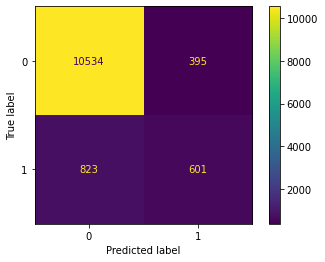

In [ ]:
#Matriz de Confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(tree, X_test, y_test)
#plt.show()

In [ ]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")

Precision Score of the classifier is: 0.6034136546184738


In [ ]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

F1 Score of the classifier is: 0.49669421487603305


### 7.3 RandomForest

Nuestro ultimo algoritmo es el Random Forest. Este es un conjunto de árboles de decisión combinados. Lo que lo diferencia del arbol de decision es que distintos árboles ven distintas porciones de los datos. Ningún árbol ve todos los datos de entrenamiento. Esto hace que cada árbol se entrene con distintas muestras de datos para un mismo problema. De esta forma, al combinar sus resultados, unos errores se compensan con otros y tenemos una predicción que generaliza mejor.

In [ ]:
#Carga de las librerías
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Separamos en train y test!
(X_train, X_test, y_train, y_test) = train_test_split(X1, y1, stratify=y1, test_size=0.30, random_state=11)

In [ ]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy1 = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy1)

% de aciertos sobre el set de evaluación: 0.8929814619930382


In [ ]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [ ]:
y_test_pred = model.predict(X_test) #Prediccion en Test

In [ ]:
#Calculo el accuracy en Test
test_accuracy2 = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy2)

% de aciertos sobre el set de evaluación: 0.9110337569821096


[[10724   237]
 [  862   530]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


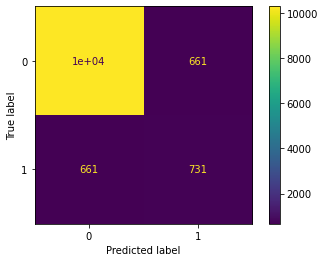

In [ ]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(tree, X_test, y_test)
#plt.show()

In [ ]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")

Precision Score of the classifier is: 0.6910039113428944


In [ ]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

F1 Score of the classifier is: 0.4909680407596109


### 7.4 Metricas de modelos

Vamos a analizar las metricas que obtuvimos de los tres modelos...

1. **SVM**



- Accuracy: 0.8960576378207723

- Precision Score of the classifier is: 0.1290743155149935

- F1 Score of the classifier is: 0.09036969420356003

- Matriz de Confusion:

  ****              | NO interesado | SI interesado |                                        |   |   |   |   
------------------------|----------|----------------------|----------|--------------------------------------|---|---|
**NO interesado** | 10765  | 164        |   |   |   |  
**SI interesado**     | 1120   | 304      |   |   |   |


2. **Decission Tree**

- Accuracy: 0.9034798598341602

- Precision Score of the classifier is: 0.6034136546184738

- F1 Score of the classifier is: 0.49669421487603305

- Matriz de Confusion:

  ****              | NO interesado | SI interesado |                                        |   |   |   |   
------------------------|----------|----------------------|----------|--------------------------------------|---|---|
**NO interesado** | 10534  | 395        |   |   |   |  
**SI interesado**     | 823   | 601      |   |   |   |


3. **Random Forest**

- Accuracy: 0.9110337569821096

- Precision Score of the classifier is: 0.6910039113428944

- F1 Score of the classifier is: 0.4909680407596109

- Matriz de Confusion:

  ****              | NO interesado | SI interesado |                                        |   |   |   |   
------------------------|----------|----------------------|----------|--------------------------------------|---|---|
**NO interesado** | 10724  | 237        |   |   |   |  
**SI interesado**     | 862   | 530      |   |   |   |


### 7.5 Analisis de modelos

Tenemos 4 metricas por cada modelo elegido. Vamos a ver que nos dice cada una..

In [ ]:
print('Nuestro modelo SVM tiene una EXACTITUD de: ' + str(0.8960576378207723 * 100)+ ' % ')
print('Nuestro modelo SVM tiene una PRECISION de: ' + str(0.1290743155149935 * 100)+ ' % ')
print('Nuestro modelo SVM tiene una F1 de: ' + str(0.09036969420356003 * 100)+ ' % ')
print('Nuestro modelo SVM tiene: ' + str(1120 + 164)+ ' Errores tipo I y II ')

Nuestro modelo SVM tiene una EXACTITUD de: 89.60576378207723 % 
Nuestro modelo SVM tiene una PRECISION de: 12.907431551499348 % 
Nuestro modelo SVM tiene una F1 de: 9.036969420356003 % 
Nuestro modelo SVM tiene: 1284 Errores tipo I y II 


In [ ]:
print('Nuestro modelo Decission Tree tiene una EXACTITUD de: ' + str(0.9034798598341602 * 100)+ ' % ')
print('Nuestro modelo Decission Tree tiene una PRECISION de: ' + str(0.6034136546184738 * 100)+ ' % ')
print('Nuestro modelo Decission Tree tiene una F1 de: ' + str(0.49669421487603305 * 100)+ ' % ')
print('Nuestro modelo Decission Tree tiene: ' + str(823 + 395)+ ' Errores tipo I y II ')

Nuestro modelo Decission Tree tiene una EXACTITUD de: 90.34798598341602 % 
Nuestro modelo Decission Tree tiene una PRECISION de: 60.34136546184739 % 
Nuestro modelo Decission Tree tiene una F1 de: 49.6694214876033 % 
Nuestro modelo Decission Tree tiene: 1218 Errores tipo I y II 


In [ ]:
print('Nuestro modelo Random Forest tiene una EXACTITUD de: ' + str(0.9110337569821096 * 100)+ ' % ')
print('Nuestro modelo Random Forest tiene una PRECISION de: ' + str(0.6910039113428944 * 100)+ ' % ')
print('Nuestro modelo Random Forest tiene una F1 de: ' + str(0.4909680407596109 * 100)+ ' % ')
print('Nuestro modelo Decission Tree tiene: ' + str(862 + 237)+ ' Errores tipo I y II ')

Nuestro modelo Random Forest tiene una EXACTITUD de: 91.10337569821097 % 
Nuestro modelo Random Forest tiene una PRECISION de: 69.10039113428944 % 
Nuestro modelo Random Forest tiene una F1 de: 49.096804075961096 % 
Nuestro modelo Decission Tree tiene: 1099 Errores tipo I y II 


Vemos que por descarte el modelo SVM da las peores metricas de Exactitud, Precision y F1. Tambien los Errores tipo I y II son mayores que en los otros modelos.

Ahora comparando los dos modelos restantes tenemos al Decision Tree y Random Forest. 

Vemos que el Random Forest tiene mejores metricas en cuanto a Accuracy, Precision y menor cantidad de errores, pero el Decission Tree tiene un mejor F1.

Si nos remontamos a las formulas de las metricas mencionadas anteriormente, vemos que el F1 incluye el Recal. Esta métrica de exhaustividad nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar. En el ejemplo, se refiere a que la exhaustividad (recall) es la respuesta a la pregunta ¿qué porcentaje de los clientes están interesados somos capaces de identificar?

Por otro lado vemos que la variacion re F1 del Decission Tree con respecto al Random Forest no es mucha. 

In [ ]:
(0.49669421487603305 - 0.4909680407596109)*100

0.5726174116422122

Casi infima si tonamos en cuenta que el las demas metricas del Random Forest son mejores. Por lo que se elige al modelo **Random Forest**.

---

## 8. MEJORA DE MODELOS

Aplicamos XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split

In [ ]:
bank3.shape

(41176, 54)

Separamos en X e Y

In [ ]:
X1 = bank3.drop(['y_yes'], axis = 1)
y1 = bank3['y_yes'] 

In [ ]:
bank3['y_yes'].unique()

array([0, 1], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state=123)

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=15,seed=42,max_depth=5, learning_rate=0.01)

In [ ]:
clf_xgb.fit(X_train,y_train) 

XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=15, seed=42)

In [ ]:
y_test_pred = clf_xgb.predict(X_test)

In [ ]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score
##train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9103933948518699


Ahora probemos el LIGHTGBM


Vemos la frecuencia de los que contratan el producto

In [ ]:
bank3['y_yes'].value_counts()

0    36537
1     4639
Name: y_yes, dtype: int64

In [ ]:
X1 = bank3.drop(['y_yes'], axis = 1)
y1 = bank3['y_yes'] 

In [ ]:
X1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_May,month_Nov,month_Oct,month_Sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
y1

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y_yes, Length: 41176, dtype: uint8

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [ ]:
#pip install lightgbm
import lightgbm as lgb 
clf = lgb.LGBMClassifier(boosting_type='gbdt',max_depth=5,learning_rate=0.1,n_estimators=5)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

Ahora veamos el accuracy de LIGHTGBM

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8847


Por último probemos aplicar el AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.8869244219933942

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbrt = GradientBoostingClassifier(random_state = 42,learning_rate=0.1,n_estimators=50)
gbrt.fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.9138333009520109

## 9. CONCLUSIONES